In [3]:
import pandas as pd
import numpy as np

In [4]:
ipl_df=pd.read_csv('C:/Users/user/Desktop/Python/Machine Learning (Codes and Data Files)/Data/IPL IMB381IPL2013.csv')

In [5]:
ipl_df.head(5)

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [6]:
list(ipl_df.columns)

['Sl.NO.',
 'PLAYER NAME',
 'AGE',
 'COUNTRY',
 'TEAM',
 'PLAYING ROLE',
 'T-RUNS',
 'T-WKTS',
 'ODI-RUNS-S',
 'ODI-SR-B',
 'ODI-WKTS',
 'ODI-SR-BL',
 'CAPTAINCY EXP',
 'RUNS-S',
 'HS',
 'AVE',
 'SR-B',
 'SIXERS',
 'RUNS-C',
 'WKTS',
 'AVE-BL',
 'ECON',
 'SR-BL',
 'AUCTION YEAR',
 'BASE PRICE',
 'SOLD PRICE']

In [7]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
Sl.NO.           130 non-null int64
PLAYER NAME      130 non-null object
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR-B             130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE   

In [8]:
ipl_df.COUNTRY.value_counts()

IND    53
AUS    22
SA     16
SL     12
PAK     9
NZ      7
WI      6
ENG     3
ZIM     1
BAN     1
Name: COUNTRY, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

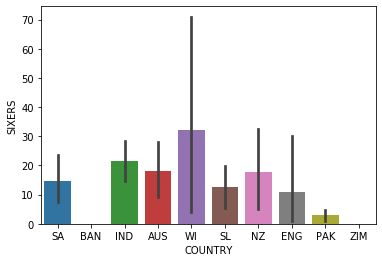

In [10]:
sn.barplot(x='COUNTRY',y='SIXERS',data=ipl_df)

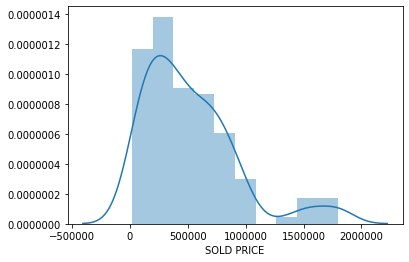

In [11]:
sn.distplot(ipl_df['SOLD PRICE'])

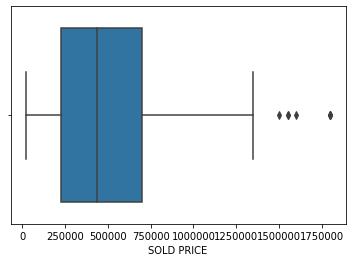

In [12]:
sn.boxplot(ipl_df['SOLD PRICE'])

In [13]:
influencial_features=['AVE','SR-B','SIXERS','COUNTRY','PLAYING ROLE','ECON','CAPTAINCY EXP','SOLD PRICE']

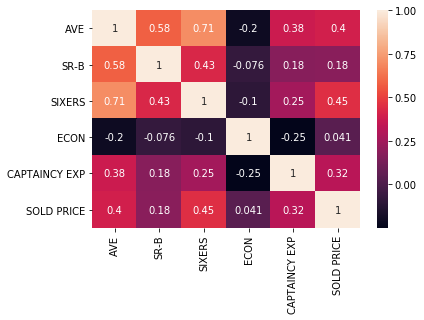

In [14]:
sn.heatmap(ipl_df[influencial_features].corr(),annot=True)

In [15]:
ipl_df_int=ipl_df.drop(['Sl.NO.','PLAYER NAME','TEAM','BASE PRICE','AUCTION YEAR','SOLD PRICE'],axis=1)
X_features=list(ipl_df_int.columns)


In [16]:
X_features=list(ipl_df_int.columns)

In [17]:
categorical_features=['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

In [18]:
ipl_encoded_df=pd.get_dummies(ipl_df[X_features],columns=categorical_features,drop_first=True)

In [19]:
X_features=ipl_encoded_df.columns

In [20]:
import statsmodels.api as sm
X=sm.add_constant(ipl_encoded_df)
Y=ipl_df['SOLD PRICE']

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
Y=ipl_df['SOLD PRICE']

In [37]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.8,random_state=42)

In [23]:
ipl_model_1=sm.OLS(train_Y,train_X).fit()

In [24]:
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2019-10-20 10:49        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( X ):
    X_matrix = X.values
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [28]:
vif_factors=get_vif_factors(X[X_features])
vif_factors

,column,vif
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [29]:
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column

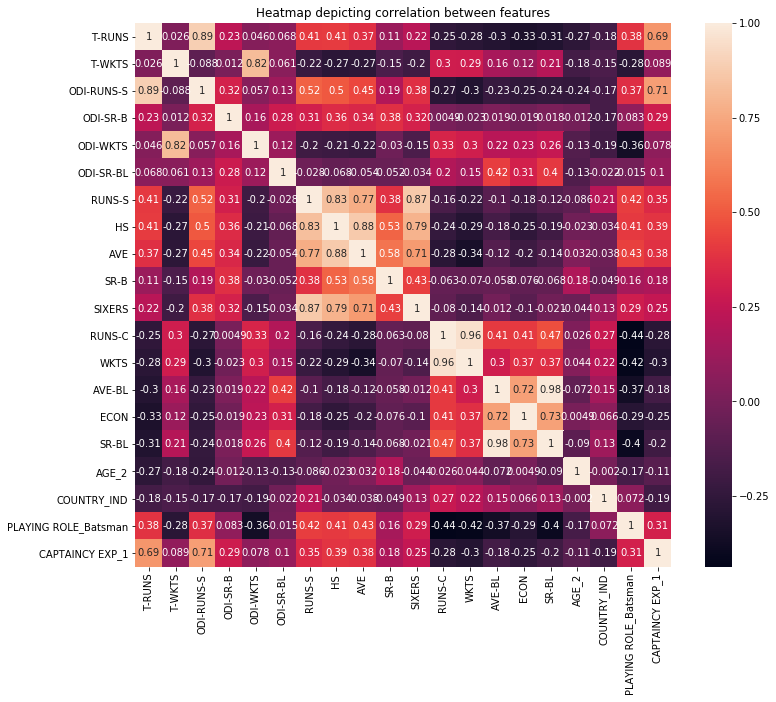

In [31]:
plt.figure( figsize = (12,10) )
sn.heatmap( X[columns_with_large_vif].corr(), annot = True );
plt.title( "Heatmap depicting correlation between features");

In [32]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS','AVE', 'RUNS-C', 'SR-B', 'AVE-BL','ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']

In [33]:
X_new_features = list( set(X_features) - set(columns_to_be_removed) )

In [34]:
get_vif_factors( X[X_new_features] )

,column,vif
0,COUNTRY_PAK,1.334773
1,SIXERS,2.397409
2,ODI-WKTS,2.742889
3,COUNTRY_NZ,1.173418
4,WKTS,2.883101
5,AGE_3,1.779861
6,PLAYING ROLE_W. Keeper,1.900941
7,COUNTRY_SL,1.519752
8,COUNTRY_IND,3.144668
9,ODI-SR-BL,2.822148


In [38]:
train_X = train_X[X_new_features]
ipl_model_2 = sm.OLS(train_Y, train_X).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2019-10-20 10:53   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [40]:
significant_vars = ['COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS', 'CAPTAINCY EXP_1']
train_X = train_X[significant_vars]
ipl_model_3 = sm.OLS(train_Y, train_X).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2019-10-20 10:54 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

In [42]:
def draw_pp_plot( model, title ):
  probplot = sm.ProbPlot( model.resid );
  plt.figure( figsize = (8, 6) );
  probplot.ppplot( line='45' );
  plt.title( title );
  plt.show();

<Figure size 576x432 with 0 Axes>

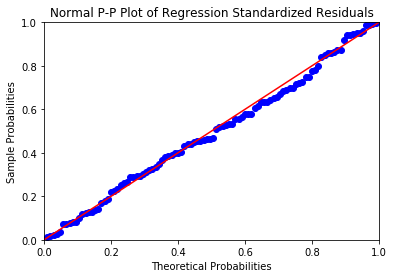

In [43]:
draw_pp_plot( ipl_model_3,"Normal P-P Plot of Regression Standardized Residuals");

In [46]:
def get_standardized_values(vals):
    return ((vals-vals.mean())/vals.std())

In [47]:
def plot_resid_fitted( fitted, resid, title):
  plt.scatter( get_standardized_values( fitted ),
  get_standardized_values( resid ) )
  plt.title( title )
  plt.xlabel( "Standardized predicted values")
  plt.ylabel( "Standardized residual values")
  plt.show()

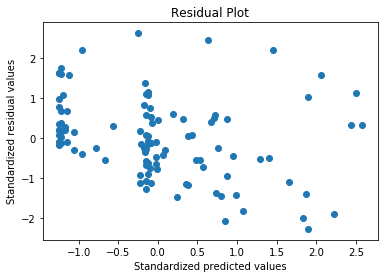

In [48]:
plot_resid_fitted( ipl_model_3.fittedvalues,ipl_model_3.resid,"Residual Plot")

In [50]:
k = train_X.shape[1]
n = train_X.shape[0]
print( "Number of variables:", k, " and number of observations:", n)

Number of variables: 4  and number of observations: 104


In [51]:
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

Cutoff for leverage value:  0.144


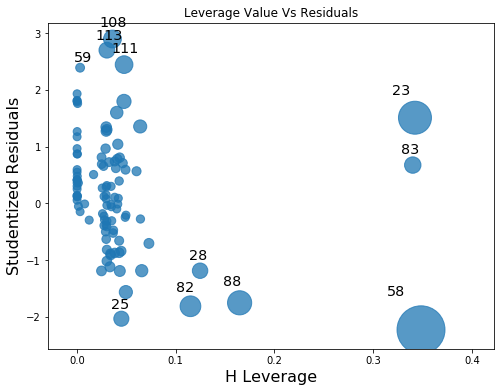

In [52]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( ipl_model_3, ax = ax )
plt.title( "Leverage Value Vs Residuals")
plt.show()

In [55]:
ipl_df[ipl_df.index.isin( [23, 58, 83] )]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


In [57]:
train_X_new = train_X.drop( [23, 58, 83], axis = 0)
train_y_new = train_Y.drop( [23, 58, 83], axis = 0)

In [60]:
ipl_model_4 = sm.OLS(train_y_new, train_X_new).fit()
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.689     
Dependent Variable:     SOLD PRICE       AIC:                         2872.3664 
Date:                   2019-10-20 11:13 BIC:                         2880.2117 
No. Observations:       101              Log-Likelihood:              -1433.2   
Df Model:               3                F-statistic:                 75.50     
Df Residuals:           98               Prob (F-statistic):          2.22e-25  
R-squared (uncentered): 0.698            Scale:                       1.2760e+11
--------------------------------------------------------------------------------
                       Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
--------------------------------------------------------------------------------
COUNTRY_IND         390069.6377 62096.7593 6.2816 0.0000 266840.6399 513298.6355
COUNTRY_ENG              0.0000     0.0000 6.7642 0.0000      0.0000      0.0000
SIXERS                8790.0052  1656.5116 5.3063 0.0000   5502.7118  12077.2986
CAPTAINCY EXP_1     334569.0056 74599.3795 4.4849 0.0000 186528.9648 482609.0464
--------------------------------------------------------------------------------
Omnibus:                1.880        Durbin-Watson:           2.251             
Prob(Omnibus):          0.391        Jarque-Bera (JB):        1.497             
Skew:                   0.294        Prob(JB):                0.473             
Kurtosis:               3.104        Condition No.:           165672002633623008
================================================================================
* The condition number is large (2e+17). This might indicate             strong
multicollinearity or other numerical problems.
"""

<Figure size 576x432 with 0 Axes>

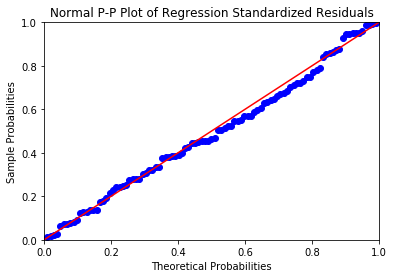

In [61]:
draw_pp_plot( ipl_model_4,"Normal P-P Plot of Regression Standardized Residuals");

In [62]:
pred_y = ipl_model_4.predict( test_X[train_X_new.columns])

In [69]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_Y))

333146.4065599984

In [71]:
np.round( metrics.r2_score(pred_y, test_Y), 2 )

0.3

In [102]:
ipl_df


,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
5,6,"Bailey, GJ",2,AUS,CSK,Batsman,0,0,172,72.26,...,95.45,0,0,0,0.00,0.00,0.00,2009,50000,50000
6,7,"Balaji, L",2,IND,CSK+,Bowler,51,27,120,78.94,...,72.22,1,1342,52,25.81,7.98,19.40,2011,100000,500000
7,8,"Bollinger, DE",2,AUS,CSK,Bowler,54,50,50,92.59,...,165.88,1,693,37,18.73,7.22,15.57,2011,200000,700000
8,9,"Botha, J",2,SA,RR,Allrounder,83,17,609,85.77,...,114.73,3,610,19,32.11,6.85,28.11,2011,200000,950000
9,10,"Boucher, MV",2,SA,RCB+,W. Keeper,5515,1,4686,84.76,...,127.51,13,0,0,0.00,0.00,0.00,2008,200000,450000


In [98]:
pred_y.columns=['SOLD PRCE PREDICTED']

In [138]:
estimates_y=train_y_new.append(pred_y)

In [144]:
ipl_final_df=pd.merge(ipl_df,estimates_y.rename('SOLD PRICE PREDICTED'), how='outer', left_index=True, right_index=True)


In [145]:
ipl_final_df

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE,SOLD PRICE PREDICTED
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0,307,15,20.47,8.90,13.93,2009,50000,50000,5.000000e+04
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0,29,0,0.00,14.50,0.00,2008,50000,50000,5.000000e+04
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,5,1059,29,36.52,8.81,24.90,2008,200000,350000,3.500000e+05
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,0,1125,49,22.96,6.23,22.14,2011,100000,850000,8.500000e+05
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,28,0,0,0.00,0.00,0.00,2011,100000,800000,6.361898e+05
5,6,"Bailey, GJ",2,AUS,CSK,Batsman,0,0,172,72.26,...,0,0,0,0.00,0.00,0.00,2009,50000,50000,5.000000e+04
6,7,"Balaji, L",2,IND,CSK+,Bowler,51,27,120,78.94,...,1,1342,52,25.81,7.98,19.40,2011,100000,500000,5.000000e+05
7,8,"Bollinger, DE",2,AUS,CSK,Bowler,54,50,50,92.59,...,1,693,37,18.73,7.22,15.57,2011,200000,700000,7.000000e+05
8,9,"Botha, J",2,SA,RR,Allrounder,83,17,609,85.77,...,3,610,19,32.11,6.85,28.11,2011,200000,950000,9.500000e+05
9,10,"Boucher, MV",2,SA,RCB+,W. Keeper,5515,1,4686,84.76,...,13,0,0,0.00,0.00,0.00,2008,200000,450000,4.500000e+05


In [147]:
export_excel = ipl_final_df.to_excel (r'C:\Users\user\Desktop\Python\IPL_Auction_Prediction.xlsx', index = None, header=True)